<a href="https://colab.research.google.com/github/Farhansyah15/TKC156/blob/main/CBIR_Baru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library 
import pandas as pd
import numpy as np
import os, cv2, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm as tq
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, Dropout, Input
from keras.optimizers import Adam, SGD
from keras.applications.vgg16 import VGG16
from keras.applications import EfficientNetB0
from google.colab import files
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Data Fix"

/content/drive/MyDrive/Data Fix


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rescale=1./255,        
                              horizontal_flip=True,
                              height_shift_range=.2,
                              width_shift_range=.2,
                              vertical_flip = True
                             )

In [ ]:
input_shape = (150, 150)

train = '/content/drive/MyDrive/Data Fix/Train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)
validation = '/content/drive/MyDrive/Data Fix/Val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

test = '/content/drive/MyDrive/Data Fix/Test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 475 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import InputLayer, Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam

model_tf= VGG16(include_top=False, input_tensor=Input(shape=(150,150,3)))
model_tf.trainable = False

model_tf.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
model = Sequential()
model.add(model_tf)
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 4, 4, 512)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 1

In [ ]:
# Compile model
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc'])

In [ ]:
N = model.fit(
    train_generator,
    epochs=100,
    validation_data = validation_generator
    )

Epoch 1/100
15/15 [==============================] - 116s 7s/step - loss: 1.8567 - acc: 0.1495 - val_loss: 1.6287 - val_acc: 0.2600
Epoch 2/100
15/15 [==============================] - 6s 382ms/step - loss: 1.6494 - acc: 0.1768 - val_loss: 1.6139 - val_acc: 0.2200
Epoch 3/100
15/15 [==============================] - 6s 385ms/step - loss: 1.5525 - acc: 0.2484 - val_loss: 1.5236 - val_acc: 0.3000
Epoch 4/100
15/15 [==============================] - 6s 384ms/step - loss: 1.3735 - acc: 0.4884 - val_loss: 1.3890 - val_acc: 0.4200
Epoch 5/100
15/15 [==============================] - 6s 384ms/step - loss: 1.2698 - acc: 0.5495 - val_loss: 1.2402 - val_acc: 0.5400
Epoch 6/100
15/15 [==============================] - 6s 382ms/step - loss: 1.1635 - acc: 0.5958 - val_loss: 1.0533 - val_acc: 0.6200
Epoch 7/100
15/15 [==============================] - 6s 385ms/step - loss: 1.0344 - acc: 0.6568 - val_loss: 1.0222 - val_acc: 0.5800
Epoch 8/100
15/15 [==============================] - 6s 388ms/step - l

In [ ]:
model.save("modeltes1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# Convert the model 1
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model 1.
with open('modeltes1.tflite', 'wb') as f:
  f.write(tflite_model)

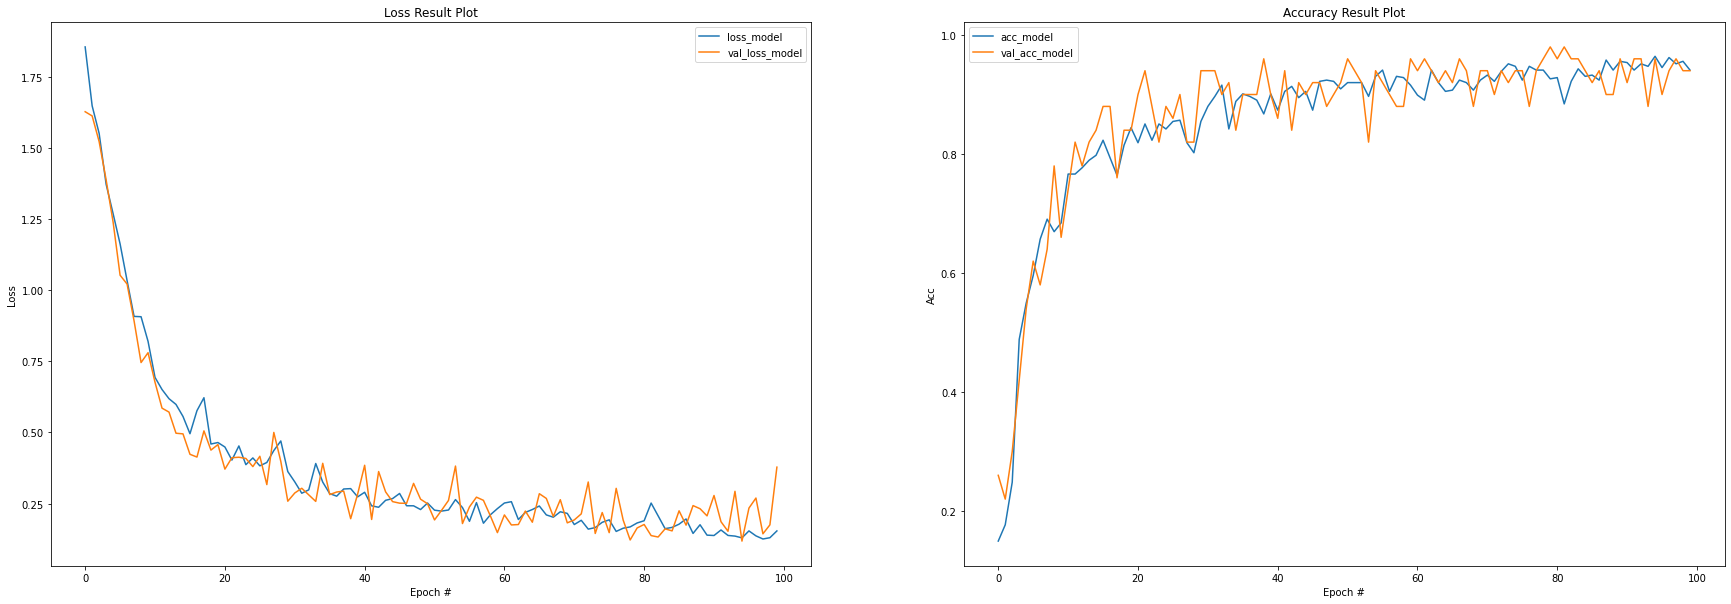

In [ ]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(30)

ax1.plot(np.arange(0, 100), N.history["loss"], label="loss_model")
ax1.plot(np.arange(0, 100), N.history["val_loss"], label="val_loss_model")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()


ax2.plot(np.arange(0, 100), N.history["acc"], label="acc_model")
ax2.plot(np.arange(0, 100), N.history["val_acc"], label="val_acc_model")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()

Accuracy: 92.00%
2/2 [==============================] - 2s 595ms/step


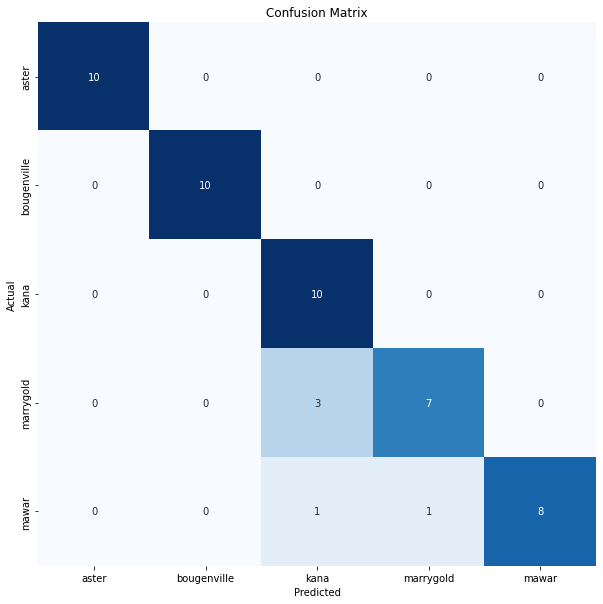

Classification Report:
----------------------
               precision    recall  f1-score   support

       aster       1.00      1.00      1.00        10
 bougenville       1.00      1.00      1.00        10
        kana       0.71      1.00      0.83        10
   marrygold       0.88      0.70      0.78        10
       mawar       1.00      0.80      0.89        10

    accuracy                           0.90        50
   macro avg       0.92      0.90      0.90        50
weighted avg       0.92      0.90      0.90        50



In [ ]:
import seaborn as sns

acc = model.evaluate(validation_generator, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model.predict(validation_generator), axis=1)

cm = confusion_matrix(validation_generator.labels, predictions, labels=[0, 1, 2, 3, 4])
clr = classification_report(validation_generator.labels, predictions, labels=[0, 1, 2, 3, 4], target_names=["aster", "bougenville", "kana", "marrygold", "mawar"])

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=["aster", "bougenville", "kana", "marrygold", "mawar"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=["aster", "bougenville", "kana", "marrygold", "mawar"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
from sklearn.metrics import classification_report

ypred = model.predict(validation_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(validation_generator.classes,predictions))

2/2 [==============================] - 1s 319ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00        10
           2       0.83      1.00      0.91        10
           3       0.88      0.70      0.78        10
           4       0.89      0.80      0.84        10

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

